In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv('../../python/data/train.csv',low_memory=False)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69010 entries, 3 to 200188
Data columns (total 36 columns):
loan_amnt                     69010 non-null float64
term                          69010 non-null object
int_rate                      69010 non-null float64
installment                   69010 non-null float64
grade                         69010 non-null object
sub_grade                     69010 non-null object
emp_title                     69010 non-null object
emp_length                    69010 non-null object
home_ownership                69010 non-null object
annual_inc                    69010 non-null float64
verification_status           69010 non-null object
issue_d                       69010 non-null object
loan_status                   69010 non-null int64
pymnt_plan                    69010 non-null object
purpose                       69010 non-null object
zip_code                      69010 non-null object
addr_state                    69010 non-null object
dti

In [3]:
data.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,policy_code,application_type,acc_now_delinq,record_id
0,15000.0,36 months,11.99,498.15,B,B3,MORTGAGE,70000.0,Verified,Oct-2013,...,1.0,17.0,3.0,12540.0,32.0,f,1.0,INDIVIDUAL,0.0,453246940
1,3725.0,36 months,6.03,113.38,A,A1,MORTGAGE,52260.0,Source Verified,Oct-2012,...,0.0,7.0,0.0,3730.0,9.0,f,1.0,INDIVIDUAL,0.0,453313687
2,16000.0,36 months,11.14,524.89,B,B2,RENT,67500.0,Source Verified,Apr-2013,...,0.0,9.0,0.0,11769.0,22.0,f,1.0,INDIVIDUAL,0.0,453283543
3,4200.0,36 months,13.33,142.19,C,C3,MORTGAGE,21600.0,Not Verified,Mar-2015,...,0.0,9.0,0.0,6797.0,19.0,w,1.0,INDIVIDUAL,0.0,453447199
4,6500.0,36 months,12.69,218.05,B,B5,RENT,41000.0,Not Verified,Jan-2012,...,0.0,8.0,0.0,14674.0,12.0,f,1.0,INDIVIDUAL,0.0,453350283


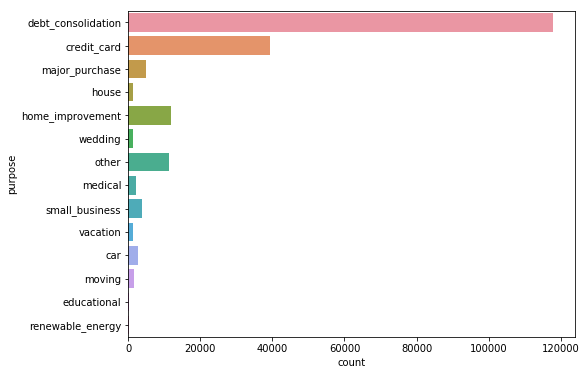

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(y = 'purpose',  data = data);


### Вывод: Наиболее популярная категория, предоставляемая заемщиком для запроса займа: консолидация долгов

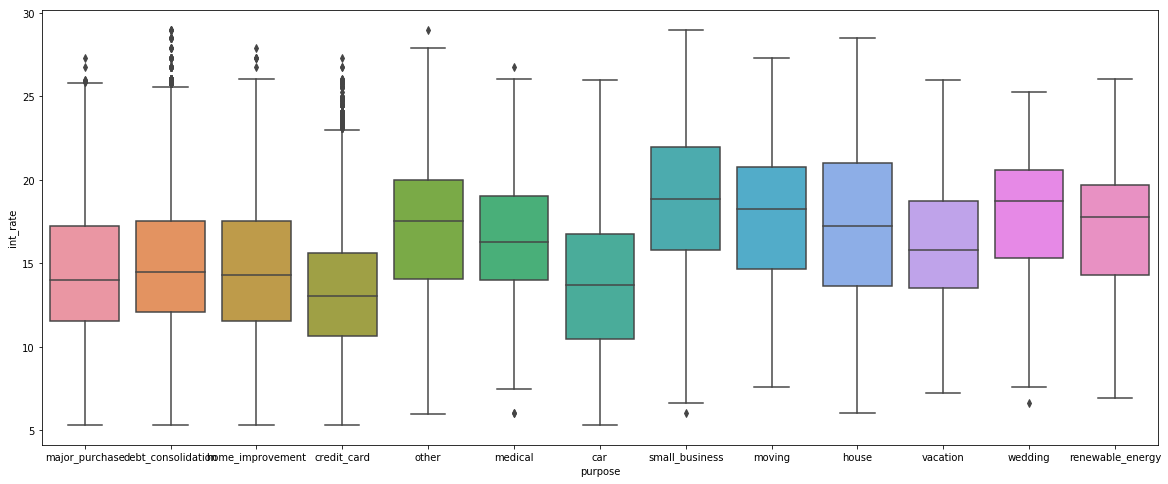

In [12]:
plt.figure(figsize=(20, 8))
sns.boxplot(y = 'int_rate', x = 'purpose',  data = data);

### Вывод: Предоставляемая процентная ставка займов на крупные покупки, консолидацию долгов, улучшение дома, покупку машины колеблется от 10 до 15%, на остальные цели от 15 до 20%. 

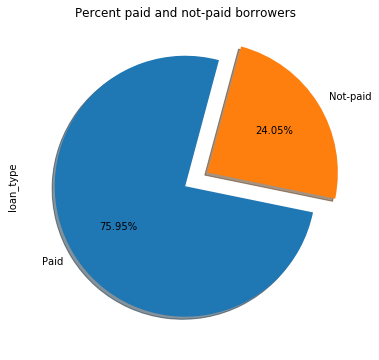

In [5]:
data['loan_type'] = data['loan_status'].map({1.0: 'Paid', 0.0: 'Not-paid'})
plt.figure(figsize=(6,6))
data.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 75);
plt.title('Percent paid and not-paid borrowers');

### Вывод: 75.95% составляют займы оплаченные, а неоплаченные займы - 24.05%

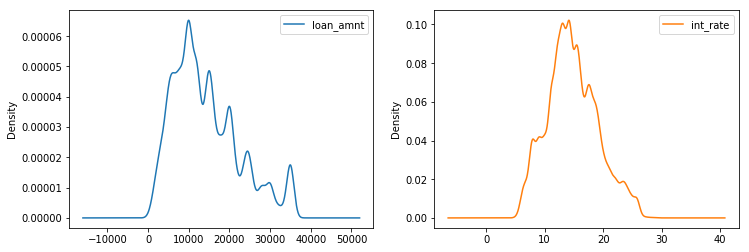

In [7]:
loan_c = ['loan_amnt', 'int_rate']

data[loan_c].plot(kind='density', subplots=True, 
                  layout=(1, 2), sharex=False, figsize=(12, 4));

### Вывод: Сумма большинства, предоставляемых займов колеблется от 10000 до 20000, а процентная ставка от 15 до 20%

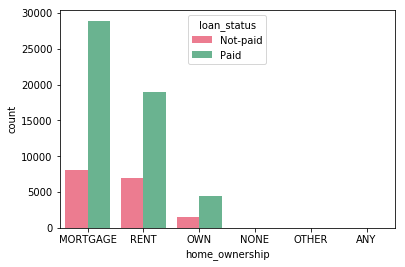

In [15]:
flatui = ["#ff6984", "#5ebf90"]
sns.set_palette(flatui)
sns.countplot(x = 'home_ownership', hue = data['loan_status'].map({0.0: 'Not-paid', 1.0: 'Paid'}),  data = data);

### Вывод: У большинства, берущих займы, статус владения недвижимостью ипотека, затем аренда, менее собственное жилье. При этом неоплаченных займов больше всего у арендующих жилье и берущих в ипотеку.

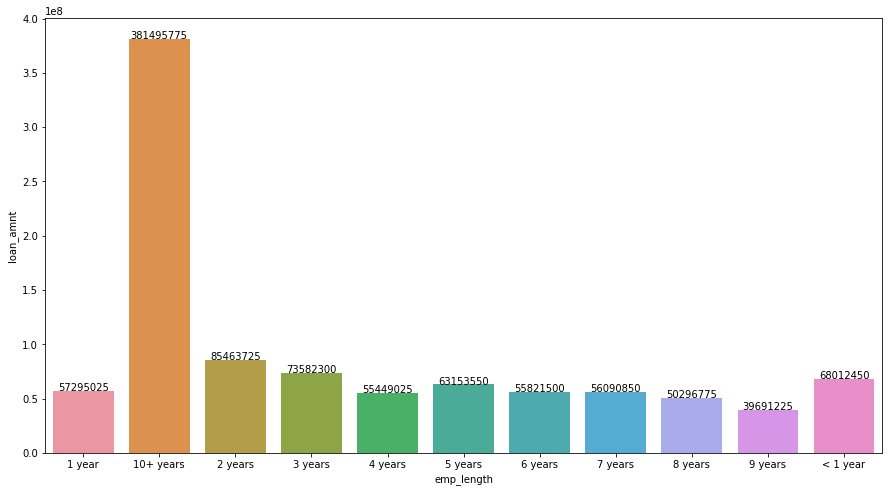

In [3]:

plt.figure(figsize=(15,8))
groupedvalues=data.groupby('emp_length').sum().reset_index()
g=sns.barplot(x='emp_length',y='loan_amnt',data=groupedvalues)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.loan_amnt, round(row.loan_amnt), color='black', ha="center")
   

### Вывод: Большую сумму займов берут заемщики с продолжительностью трудоустройства от 10 и более лет.

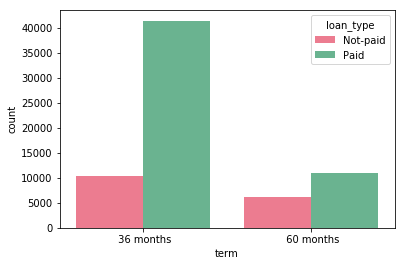

In [19]:
flatui = ["#ff6984","#5ebf90"]
sns.set_palette(flatui)
data['loan_type'] = data['loan_status'].map({1.0: 'Paid', 0.0: 'Not-paid'})
sns.countplot(x = 'term', hue = 'loan_type', data = data);


### Вывод: Болшинство займов, где количество платежей по кредиту составляет 36 месяцев, при этом доля оплаченных займов больше, где количество платежей по кредиту составляет 36 месяцев 

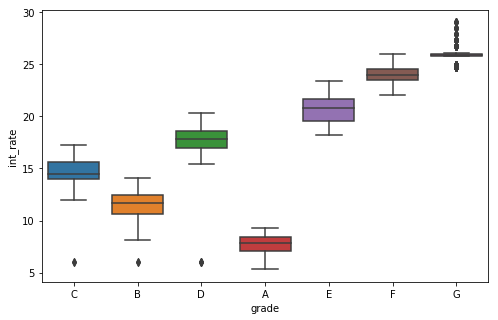

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(y = 'int_rate', x = 'grade',  data = data);

### Вывод: Большая вероятность допущения просрочки при процентной ставке свыше 20%. 

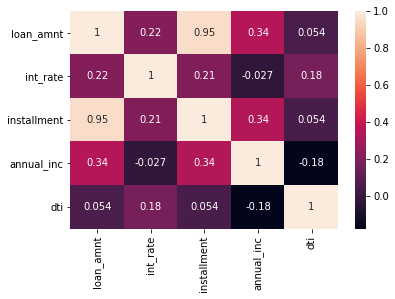

In [11]:
corr_matrix = data.drop(['loan_status', 'delinq_2yrs', 'inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc','policy_code',
                      'record_id', 'acc_now_delinq'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True);